<img src="https://raw.githubusercontent.com/hectormelo/Machine-Learning-Techniques/main/Banner.png" ><br>
# Machine Learning Techniques - MISIS4219
Primer semestre - 2024


## Taller 6

Este taller consta de un punto, el cual se desarrollara implementando todo lo que hemos visto en esta y las anteriores clases.

**Integrante 1: Carlos Raúl de la Rosa Peredo**

**Integrante 2: Jhon Stewar Rayo Mosquera**

**NOTA:**  El archivo .pynb entregado debe tener todas las celdas ejecutadas, con los resultados visibles. El nombre del archivo debe ser NombreCompleto_Taller6.ipynb

In [42]:
!pip install -q yfinance
!pip install pandas-datareader
!pip install -U scikit-learn

  Using cached scikit_learn-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Using cached threadpoolctl-3.4.0-py3-none-any.whl (17 kB)
  Using cached scipy-1.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
  Using cached joblib-1.4.0-py3-none-any.whl (301 kB)


## Objetivo: Predecir los próximos valores de cierre de stocks de compañías, dado el registro histórico de estas

In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Para leer los datos de Yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# para settear tiempos
from datetime import datetime

from sklearn.preprocessing import StandardScaler

## Dataset: Para este problema usaremos la librería yfinance, la cual retorna los valores de stock para diferentes empresas, en este caso tenemos los valores de APPLE - AAPL, GOOGLE - GOOG, Microsoft _ MSFT, Amazon - AMZN

Como ejemplo solamente usamos los registros de 1 año, para el taller cambiar el codigo para ver los registros de los ultimos **3 años**

In [6]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

#Asignamos el rango de fechas en las que queremos consultar los datos
end = datetime.now() #fecha actual
start = datetime(end.year - 3, end.month, end.day) #Fecha de hace tres años

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-04-08,186.899994,187.289993,184.809998,185.190002,185.190002,39221300,AMAZON
2024-04-09,187.240005,187.339996,184.199997,185.669998,185.669998,36546900,AMAZON
2024-04-10,182.770004,186.270004,182.669998,185.949997,185.949997,35879200,AMAZON
2024-04-11,186.740005,189.770004,185.509995,189.050003,189.050003,40020700,AMAZON
2024-04-12,187.720001,188.380005,185.080002,186.130005,186.130005,38554300,AMAZON
2024-04-15,187.429993,188.690002,183.000000,183.619995,183.619995,48052400,AMAZON
2024-04-16,183.270004,184.830002,182.259995,183.320007,183.320007,32891300,AMAZON
2024-04-17,184.309998,184.570007,179.820007,181.279999,181.279999,31359700,AMAZON
2024-04-18,181.470001,182.389999,178.649994,179.220001,179.220001,30723800,AMAZON


# Seleccionar los datos de una de las compañías previamente ejecutadas y obtener los valores de stock de cierre (Close o Adj close) y graficar la variación de los precios de salida a lo largo del tiempo seleccionado

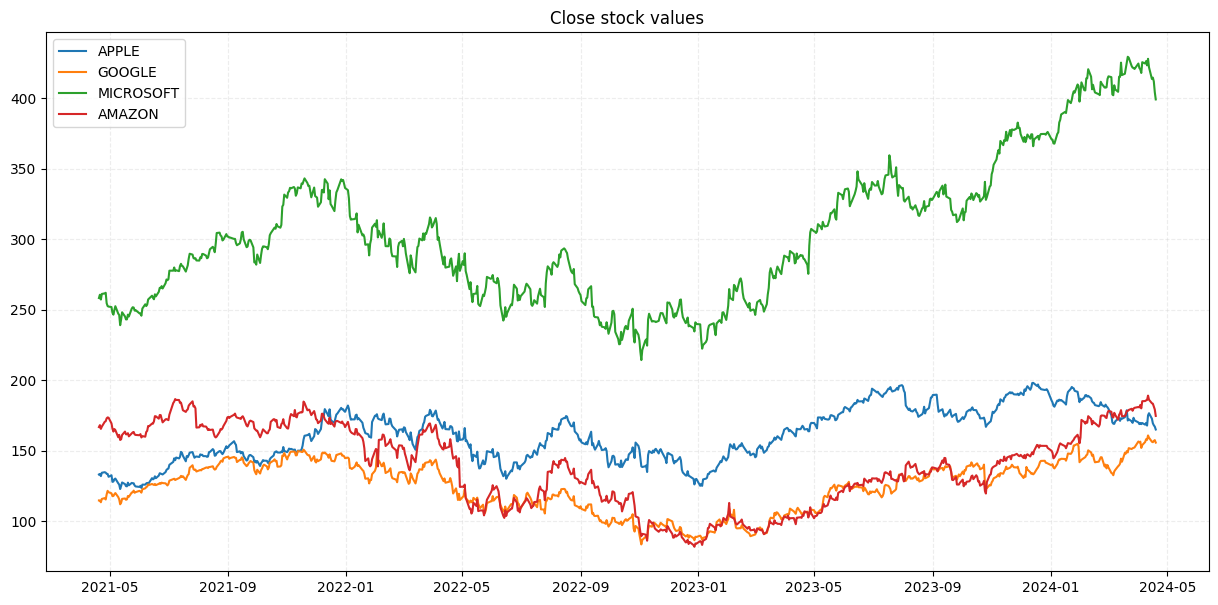

In [15]:
plt.figure(figsize=(15,7))
plt.title('Close stock values')
for c in df.company_name.unique():
    df_f = df.query(f'company_name=="{c}"')
    plt.plot(df_f.index, df_f.Close, label=c)
    plt.legend()
    plt.grid(linestyle='--', color='lightgray', alpha=.4)
plt.plot();
    

In [40]:
microsoft_data = df.query('company_name=="MICROSOFT"')[['Close']]
microsoft_data

,Close
Date,
2021-04-20,258.260010
2021-04-21,260.579987
2021-04-22,257.170013
2021-04-23,261.149994
2021-04-26,261.549988
...,...
2024-04-15,413.640015
2024-04-16,414.579987
2024-04-17,411.839996


## Tomar el 60% de los datos para entrenar 20% para validación y 20% para test

In [50]:
# Suponiendo que 'df' es tu DataFrame que ya has cargado.
microsoft = microsoft_data.values

# Normalización de datos
scaler = StandardScaler()
microsoft_scaled = scaler.fit_transform(microsoft)


sequence_length = 15

# Crear datos de entrenamiento
x_train = []
y_train = []

for i in range(sequence_length, len(microsoft_scaled)):
    x_train.append(microsoft_scaled[i-sequence_length:i])
    y_train.append(microsoft_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Dividir los datos
num_train_samples = int(0.6 * len(x_train))
num_val_samples = int(0.2 * len(x_train))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples #los datos restantes

print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)


x_test = x_train[num_train_samples+num_val_samples:]
y_test = y_train[num_train_samples+num_val_samples:]

x_val = x_train[num_train_samples:num_train_samples+num_val_samples]
y_val = y_train[num_train_samples:num_train_samples+num_val_samples]

x_train = x_train[:num_train_samples]
y_train = y_train[:num_train_samples]

num_train_samples: 444
num_val_samples: 148
num_test_samples: 164


In [51]:
x_train.shape, y_train.shape


((444, 15, 1), (444,))

Para crear nuestro dataset de entrenamiento, prueba y validación usaremos la función 'timeseries_dataset_from_array'.

La idea general es que al proporcionar una matriz de datos de series temporales (el argumento de datos), timeseries_dataset_from_array
te da ventanas extraídas de la serie temporal original.

Por ejemplo, supomgamos que nuestros datos son: [0 1 2 3 4 5 6] y sequence_length=3, entonces timeseries_dataset_from_array generará las siguientes muestras: [0 1 2], [2 3 4], [3 4 5], [4 5 6].

Usaremos la función timeseries_dataset_from_array para inicializar tres datasets: uno para entrenamiento, otro para prueba y otro para validación:


* sequence_length : Longitud de las secuencias de salida (en número de pasos de tiempo).


Documentación: https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array


In [57]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Crear Modelo

In [71]:
input_shape = (x_train.shape[1], 1)  # sequence_length, 1 feature
inputs = Input(shape=input_shape)
x = LSTM(50)(inputs)
outputs = Dense(1)(x)  # salida continua para la predicción de precio

model = Model(inputs, outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error',
              metrics=[tf.metrics.MeanSquaredError()])


checkpoint_callback = ModelCheckpoint(
    filepath='models/lstm_best.keras',  # Asegúrate de tener el directorio correcto y accesible
    monitor='val_mean_squared_error',  # Usa 'val_loss' si 'mean_squared_error' no funciona
    mode='min',
    save_best_only=True,
    save_weights_only=False,
    verbose=1)


# Entrenamiento
history = model.fit(
    x_train, y_train,
    epochs=300,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1,
    callbacks=[checkpoint_callback]
)

####
# Cargar el mejor modelo guardado después del entrenamiento.
lstm_model = load_model('models/lstm_best.keras')

lstm_model.summary()

Epoch 1/300
 1/14 [=>............................] - ETA: 19s - loss: 0.6356 - mean_squared_error: 0.6356
Epoch 1: val_mean_squared_error improved from inf to 0.15040, saving model to models/lstm_best.keras
14/14 [==============================] - 2s 31ms/step - loss: 0.3888 - mean_squared_error: 0.3888 - val_loss: 0.1504 - val_mean_squared_error: 0.1504
Epoch 2/300
 1/14 [=>............................] - ETA: 0s - loss: 0.0804 - mean_squared_error: 0.0804
Epoch 2: val_mean_squared_error improved from 0.15040 to 0.10229, saving model to models/lstm_best.keras
14/14 [==============================] - 0s 7ms/step - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.1023 - val_mean_squared_error: 0.1023
Epoch 3/300
 1/14 [=>............................] - ETA: 0s - loss: 0.0555 - mean_squared_error: 0.0555
Epoch 3: val_mean_squared_error improved from 0.10229 to 0.06870, saving model to models/lstm_best.keras
14/14 [==============================] - 0s 6ms/step - loss: 0.0532 - mean

# Evaluación del modelo

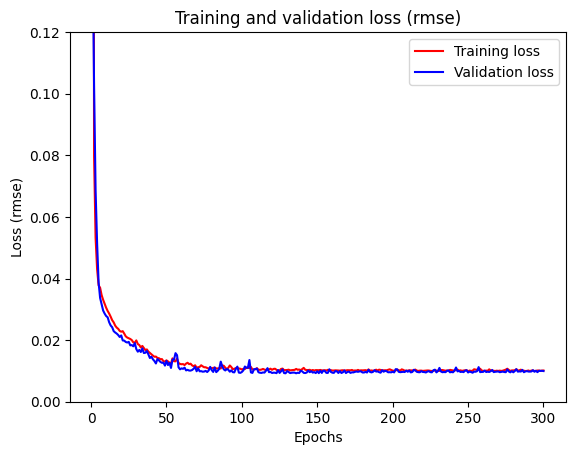

In [72]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss (rmse)')
plt.xlabel('Epochs')
plt.ylabel('Loss (rmse)')
plt.legend()
plt.ylim(0, .12)
plt.show()

In [73]:
score_lstm_model = lstm_model.evaluate(x_test, y_test)

#modelo_base
y_pred_base = lstm_model.predict(x_test)
#y_pred_base = y_pred_base.argmax(axis=-1)

5/5 [==============================] - 0s 2ms/step


## Graficar resultados

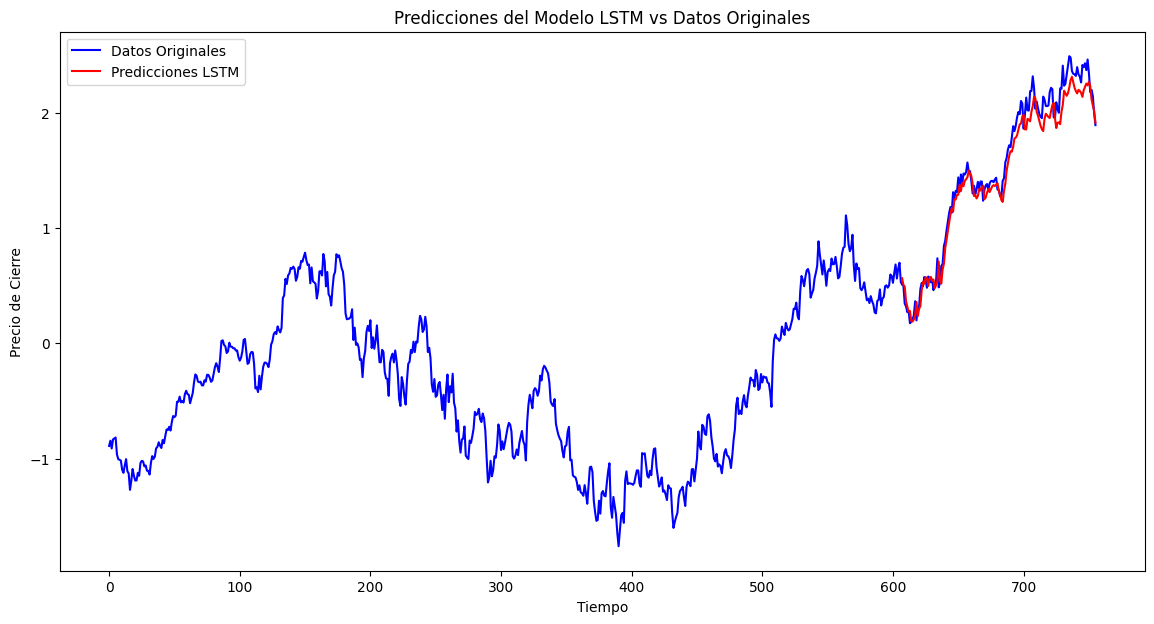

In [81]:
all_data = scaler.inverse_transform(microsoft_scaled).flatten()  # Ajustar según cómo se prepararon los datos

# Calcular el índice donde empiezan las predicciones en el dataset original
start = len(all_data) - len(y_pred_base)

# Graficar los datos originales
plt.figure(figsize=(14, 7))
plt.plot(microsoft_scaled.flatten(), label='Datos Originales', color='blue')

# Graficar las predicciones
# Asegúrate de alinear las predicciones con su posición correcta en el tiempo
plt.plot(range(start, start + len(y_pred_base)), y_pred_base, label='Predicciones LSTM', color='red')

# Añadir títulos y etiquetas
plt.title('Predicciones del Modelo LSTM vs Datos Originales')
plt.xlabel('Tiempo')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()